In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic import TabularMagic
from tabularmagic.ml import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR, KBestSelectorR)
from tabularmagic.ml import LinearC



df_train = pd.read_csv(f'{directory_path}/house_price_data/data.csv', 
                       index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df_train, test_size=0.2, name='Housing sale price data')
tm

INFO: Initialization complete. Shapes of train, test DataFrames: (1168, 80), 
      (292, 80). 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
  'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
  'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
  'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
  'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
  'SaleCondition' 
                                                                                
Numerical variables:
  

In [4]:
tm.eda('all').numerical_summary_statistics()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
min,20.000000,21.000000,1.300000e+03,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,3.490000e+04
max,190.000000,313.000000,2.152450e+05,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,7.550000e+05
mean,56.897260,70.049958,1.051683e+04,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,1.809212e+05
std,42.300571,24.284752,9.981265e+03,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,7.944250e+04
variance,1789.338306,589.749169,9.962565e+07,1.912679,1.238322,912.215413,426.232822,32784.971168,208025.468469,26023.907779,195246.406179,192462.361709,149450.079204,190557.075337,2364.204048,276129.633363,0.269268,0.057003,0.303508,0.252894,0.665494,0.048549,2.641903,0.415595,609.582509,0.558480,45712.510229,15709.813370,4389.861203,3735.550326,859.505871,3108.889359,1614.215993,246138.055397,7.309595,1.763837,6.311111e+09
skew,1.406210,2.160866,1.219514e+01,0.216721,0.692355,-0.612831,-0.503044,2.666326,1.683771,4.250888,0.919323,1.522688,1.375342,0.812194,9.002080,1.365156,0.595454,4.099186,0.036524,0.675203,0.211572,4.483784,0.675646,0.648898,-0.648708,-0.342197,0.179796,1.539792,2.361912,3.086696,10.293752,4.117977,14.813135,24.451640,0.211835,0.096170,1.880941e+00
kurtosis,1.570675,17.375300,2.025438e+02,0.091857,1.098521,-0.442155,-1.271999,10.043602,11.076090,20.040415,0.469262,13.201042,5.722076,-0.555677,82.945932,4.874266,-0.840334,16.336436,-0.858217,-1.077349,2.219135,21.454627,0.873641,-0.220601,-0.421174,0.216135,0.909823,2.978604,8.457180,10.390972,123.235177,18.371874,222.500507,698.600840,-0.406834,-1.190634,6.509812e+00
q1,20.000000,59.000000,7.553500e+03,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1.299750e+05
median,50.000000,69.000000,9.478500e+03,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1.630000e+05


In [6]:
tm.eda('all').anova_oneway(
    numerical_var='SalePrice', stratify_by='Exterior2nd'
)

One-way ANOVA 
--------------------------------------------------------------------------------
f-statistic: 17.501                        p-value: 0.0                          
--------------------------------------------------------------------------------
H0: All group means are equal 
HA: At least one group mean is different from the others 

In [7]:
tm.eda('all').ttest(
    numerical_var='SalePrice', stratify_by='Street'
)

Welch's t-test 
--------------------------------------------------------------------------------
t-statistic: -1.901                       p-value: 0.115                         
--------------------------------------------------------------------------------
H0: mu_1 = mu_2 
HA: mu_1 != mu_2 
mu_1 - mu_2: -50940.039 
Degrees of freedom: 5.061 
--------------------------------------------------------------------------------
Group 1 label: Grvl. Group 2 label: Pave.  

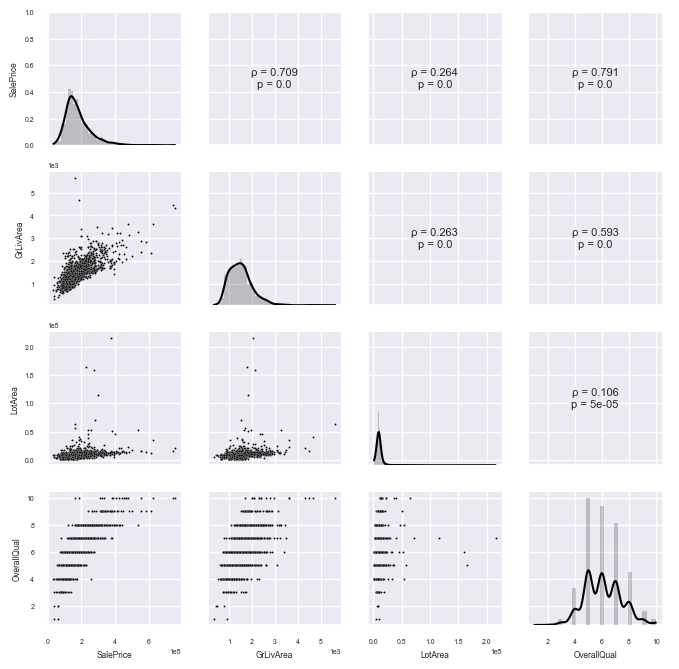

In [9]:
tm.eda('all').plot_numerical_pairs(
    numerical_vars=['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual']
)

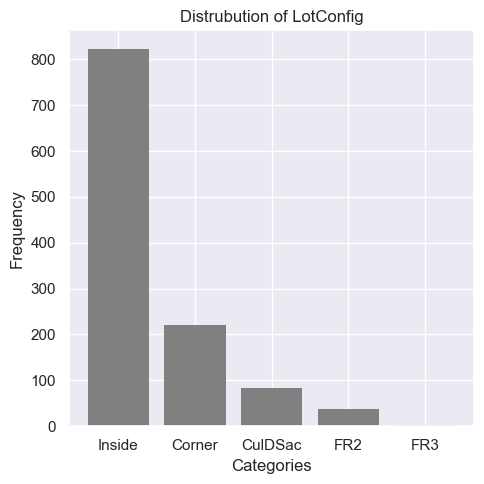

In [10]:
tm.eda().plot_distribution('LotConfig')

In [11]:
tm.datahandler().force_binary(['LotConfig'], 'Inside', ignore_multiclass=True)

INFO: Forced variables 'LotConfig' to binary. Variables renamed to 
      'I_TRUE(LotConfig)'. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
  'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                
Numerical variables:
  'MSSubClass', 'L

In [12]:
tm.datahandler().impute(
    include_vars=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 
                  'SalePrice', 'LotFrontage'],
    exclude_vars=['SalePrice']
)

INFO: Imputed missing values with numerical strategy median and categorical 
      strategy most_frequent. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
  'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
  'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
  'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                
Numerical variables:
  'MSSubClass', 'L

In [13]:
report = tm.ml_regression(
    models=[
        LinearR('ols'),
        LinearR('l1'), 
        LinearR('l2'), 
        # SVMR('rbf'), 
        # TreeEnsembleR('adaboost')
    ],
    y_var='SalePrice',
    X_vars=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 'LotFrontage'],
    outer_cv=5
)

INFO: Fitting model LinearR(ols). 
INFO: Fitted model LinearR(ols). 
INFO: Fitting model LinearR(l1). 
INFO: Fitted model LinearR(l1). 
INFO: Fitting model LinearR(l2). 
INFO: Fitted model LinearR(l2). 


In [14]:
report.fit_statistics('train')

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,44224.105583,44224.106553,44242.521845
mad,30677.468731,30677.348889,30655.219934
pearsonr,0.819818,0.819818,0.819654
spearmanr,0.851376,0.851376,0.850453
r2,0.672101,0.672101,0.671828
adjr2,0.669552,0.669552,0.669277
n,1168,1168,1168


Fold-specific fit statistics

In [16]:
report.cv_fit_statistics(True)

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,45210.509429,45211.659423,45234.750456
mad,31176.748954,31137.547741,31132.861869
pearsonr,0.813483,0.813421,0.813252
spearmanr,0.846607,0.846207,0.845942
r2,0.655806,0.655792,0.65543
adjr2,0.641953,0.641939,0.641562
n,233.6,233.6,233.6


Test fit statistics

In [13]:
report.fit_statistics('test')

,LinearR(ols),LinearR(l1),LinearR(l2)
Statistic,,,
rmse,49441.401328,49429.400417,49294.984302
mad,31893.192954,31879.403956,31694.256912
pearsonr,0.831046,0.831162,0.832556
spearmanr,0.85885,0.859459,0.860959
r2,0.681311,0.681465,0.683195
adjr2,0.672302,0.672461,0.67424
n,292,292,292


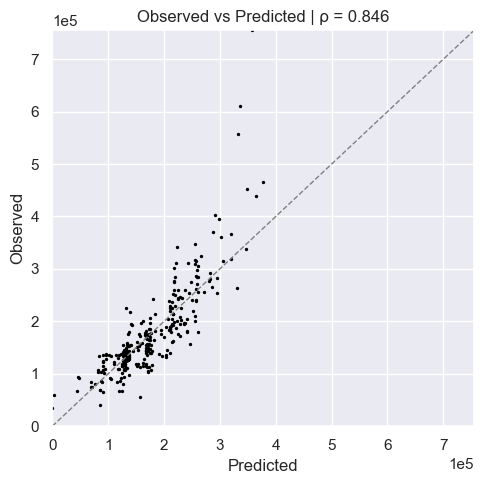

In [17]:
report.model_report('LinearR(l2)').test_report().plot_obs_vs_pred()

In [19]:
report = tm.lm(
    formula='SalePrice ~ SaleCondition + YrSold + OverallQual + LotArea + LotFrontage',
)

WARN: Columns 'SaleCondition_AdjLand' not in test have been added to test with 
      0-valued entries. 


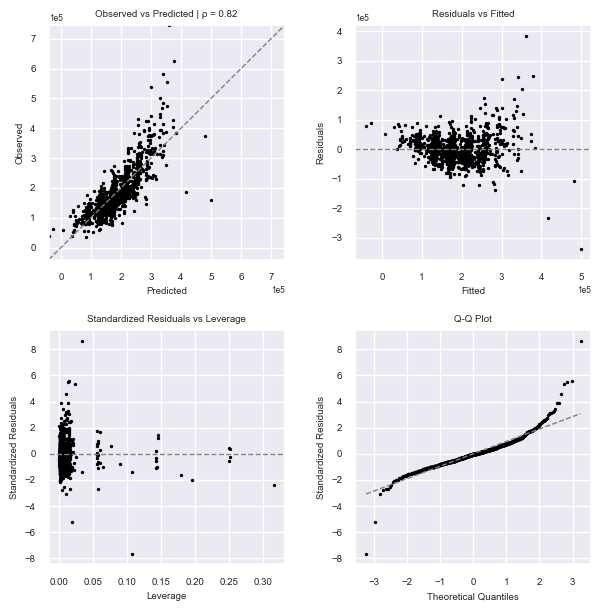

In [20]:
report.train_report().plot_diagnostics()